In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
img=plt.imread('group_photo.jpg')
img1=cv2.imread("group_photo.jpg")

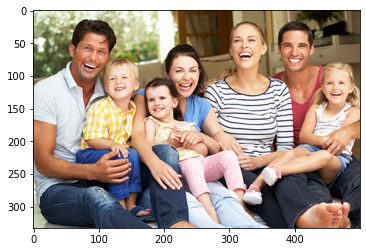

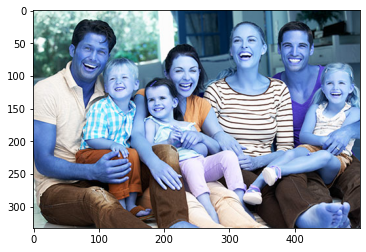

In [3]:
plt.imshow(img)
plt.show()
plt.imshow(img1)
plt.show()

In [6]:
# cv2.imshow("Family Image", img1)
# cv2.waitKey(5000)
# cv2.destroyAllWindows()

In [11]:
img.shape

(333, 500, 3)

In [12]:
import cv2

In [13]:
model=cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

In [14]:
faces=model.detectMultiScale(img)

In [15]:
#Each face contains x,y,w,h
print(faces.shape)
faces

(7, 4)


array([[439,  92,  49,  49],
       [108,  86,  48,  48],
       [374,  34,  55,  55],
       [168, 118,  46,  46],
       [207,  72,  53,  53],
       [ 63,  38,  59,  59],
       [296,  24,  56,  56]], dtype=int32)

In [16]:
print(faces.shape)

(7, 4)


In [19]:
for face in faces:
    x,y,w,h=face
    
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

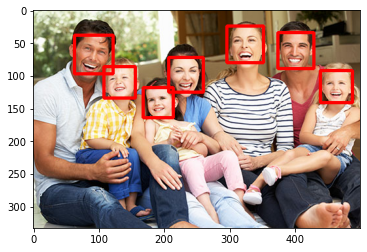

In [20]:
plt.imshow(img)
plt.show()

### Face Detection using a running video stream

In [ ]:
# Write a Python Script that captures images from your webcam video stream
# Extracts all Faces from the image frame (using haarcascades)
# Stores the Face information into numpy arrays

# 1. Read and show video stream, capture images
# 2. Detect Faces and show bounding box (haarcascade)
# 3. Flatten the largest face image(gray scale) and save in a numpy array
# 4. Repeat the above for multiple people to generate training data


import cv2
import numpy as np

#Init Camera
# 0 by default takes the inbuilt webcam
cap = cv2.VideoCapture(0)

# Face Detection
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

skip = 0
face_data = []
dataset_path = './data/'
file_name = input("Enter the name of the person : ")
while True:
	ret,frame = cap.read()

	#If for any reason the frame is not captured then try it again.
	if ret==False:
		continue

	gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
	

	faces = face_cascade.detectMultiScale(frame,1.3,5)
	if len(faces)==0:
		continue
	#Each face will be accomapanied with four parameters (x,y,w,h)
	#We will sort the faces on the basis of its area (w*h)=(f[2]*f[3])
	faces = sorted(faces,key=lambda f:f[2]*f[3])

	# Pick the last face (because it is the largest face acc to area(f[2]*f[3]))
	for face in faces[-1:]:
		x,y,w,h = face
		cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)

		#Extract (Crop out the required face from a given Frame) : Region of Interest
		#Offset is the extra pixel added around the face (Padding)
		offset = 10
		face_section = frame[y-offset:y+h+offset,x-offset:x+w+offset]
		face_section = cv2.resize(face_section,(100,100))

		#We are going to store every 10th frame
		skip += 1
		if skip%10==0:
			face_data.append(face_section)
			print(len(face_data))


	cv2.imshow("Frame",frame)
	cv2.imshow("Face Section",face_section)

	key_pressed = cv2.waitKey(1) & 0xFF
	if key_pressed == ord('q'):
		break

# Convert our face list array into a numpy array
face_data = np.asarray(face_data)
face_data = face_data.reshape((face_data.shape[0],-1))
print(face_data.shape)

# Save this data into file system
np.save(dataset_path+file_name+'.npy',face_data)
print("Data Successfully save at "+dataset_path+file_name+'.npy')

cap.release()
cv2.destroyAllWindows()

Enter the name of the person : xyz
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
